In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as st
#import statsmodels.api as sm
import pandas as pd
import math
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv("Datasets/health_ita.csv", sep=",",decimal=".")
#print(data["Indicator Name"].unique())
data[data["Indicator Name"] == "Hospital beds (per 1,000 people)"].head()

,Country Name,Country ISO3,Year,Indicator Name,Indicator Code,Value
1065,Italy,ITA,2018,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.14
1066,Italy,ITA,2017,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.18
1067,Italy,ITA,2016,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.17
1068,Italy,ITA,2015,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.20
1069,Italy,ITA,2014,"Hospital beds (per 1,000 people)",SH.MED.BEDS.ZS,3.21


In [4]:
data = pd.read_csv("Datasets/health_ita.csv", sep=",",decimal=".")
data = data.drop(columns=['Country Name','Country ISO3'])
data.head()

,Year,Indicator Name,Indicator Code,Value
0,2012,Proportion of women subjected to physical and/...,SG.VAW.1549.ZS,7.00000
1,2019,"Total alcohol consumption per capita, female (...",SH.ALC.PCAP.FE.LI,3.53716
2,2015,"Total alcohol consumption per capita, female (...",SH.ALC.PCAP.FE.LI,3.40767
3,2010,"Total alcohol consumption per capita, female (...",SH.ALC.PCAP.FE.LI,3.21568
4,2005,"Total alcohol consumption per capita, female (...",SH.ALC.PCAP.FE.LI,3.72126


In [5]:
beds = data[data["Indicator Name"] == "Hospital beds (per 1,000 people)"]
beds=beds.drop('Indicator Code',axis=1)
beds.head()

,Year,Indicator Name,Value
1065,2018,"Hospital beds (per 1,000 people)",3.14
1066,2017,"Hospital beds (per 1,000 people)",3.18
1067,2016,"Hospital beds (per 1,000 people)",3.17
1068,2015,"Hospital beds (per 1,000 people)",3.20
1069,2014,"Hospital beds (per 1,000 people)",3.21


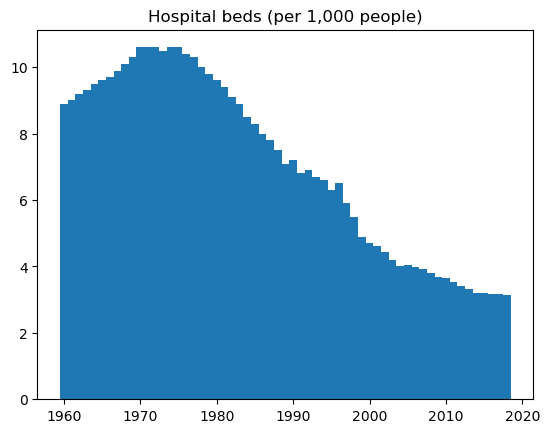

In [6]:
plt.bar(beds['Year'], beds['Value'], width=1) 
plt.title("Hospital beds (per 1,000 people)")
plt.show()

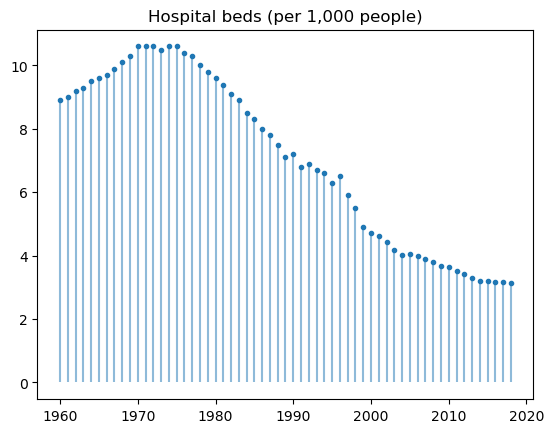

In [7]:
#VARIANTE!!!!!!!!!!!!!!!!!!!!!!!!!
plt.vlines(beds['Year'], 0, beds['Value'], alpha=0.5) 
plt.plot(beds['Year'], beds['Value'],'.') 
plt.title("Hospital beds (per 1,000 people)")
plt.show()

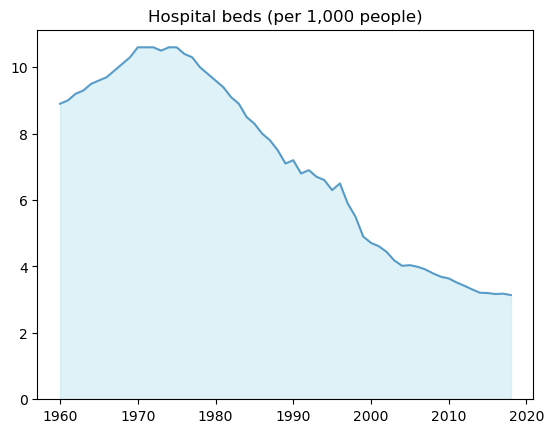

In [8]:
#VARIANTE!!!!!!!!!!!!!!!!!!!!!!!!!
plt.plot(beds['Year'], beds['Value'], alpha=0.7)
plt.fill_between(beds['Year'],beds['Value'],alpha=0.5, color='#BFE7F1')
#plt.plot(beds['Year'], beds['Value'],".", color="blue") 
plt.title("Hospital beds (per 1,000 people)")
plt.ylim(0)
plt.show()

In [9]:
data1 = pd.read_csv("Datasets/Posti_letto_per_struttura_ospedaliera_2020.csv", sep=";",encoding='cp1252')
data1.head()

,Anno,Codice Regione,Descrizione Regione,Codice Azienda,Tipo Azienda,Codice struttura,Denominazione struttura,Indirizzo,Codice Comune,Comune,Sigla provincia,Codice tipo struttura,Descrizione tipo struttura,Tipo di Disciplina,Posti letto degenza ordinaria,Posti letto degenza a pagamento,Posti letto Day Hospital,Posti letto Day Surgery,Totale posti letto
0,2020,10,PIEMONTE,203,1,10030,OSPEDALI RIUNITI PINEROLO,VIA BRIGATA CAGLIARI 39,1191,PINEROLO,TO,1.0,Ospedale a gestione diretta,ACUTI,180,0,6,13,199
1,2020,10,PIEMONTE,203,1,10030,OSPEDALI RIUNITI PINEROLO,VIA BRIGATA CAGLIARI 39,1191,PINEROLO,TO,1.0,Ospedale a gestione diretta,LUNGODEGENZA,18,0,0,0,18
2,2020,10,PIEMONTE,203,1,10030,OSPEDALI RIUNITI PINEROLO,VIA BRIGATA CAGLIARI 39,1191,PINEROLO,TO,1.0,Ospedale a gestione diretta,RIABILITAZIONE,17,0,0,0,17
3,2020,10,PIEMONTE,203,1,10079,OSPEDALI RIUNITI RIVOLI,VIA RIVALTA 29,1219,RIVOLI,TO,1.0,Ospedale a gestione diretta,ACUTI,277,0,9,18,304
4,2020,10,PIEMONTE,203,1,10079,OSPEDALI RIUNITI RIVOLI,VIA RIVALTA 29,1219,RIVOLI,TO,1.0,Ospedale a gestione diretta,LUNGODEGENZA,15,0,0,0,15


In [10]:
postiLetto2020=data1["Totale posti letto"].sum()
#abbiamo diviso per la dimensione della popolazione italiana nel 2020 e moltiplicato per 1000
#così abbiamo ottenuto il numero di posti letto per 1000 persone in Italia
postiLetto2020/60244639*1000

3.4263463675166186

In [11]:
postiLetto2020Regioni=data1[["Descrizione Regione","Totale posti letto"]]
postiLetto2020Regioni=postiLetto2020Regioni.groupby(['Descrizione Regione']).sum()
postiLetto2020Regioni.sort_index(inplace=True)

postiLetto2020Regioni.head()

,Totale posti letto
Descrizione Regione,
ABRUZZO,4323
BASILICATA,1804
CALABRIA,5721
CAMPANIA,17184
EMILIA ROMAGNA,15869


In [12]:
popolazioneRegioni2020=pd.read_csv("Datasets/Popolazione_Regioni_2020.csv", sep=",")
popolazioneRegioni2020.head()
popolazioneRegioni2020 = popolazioneRegioni2020.groupby(['Territorio']).sum()
popolazioneRegioni2020 = popolazioneRegioni2020[["Value"]]
popolazioneRegioni2020= popolazioneRegioni2020.rename(columns={'Value':'Totale abitanti'})
popolazioneRegioni2020=popolazioneRegioni2020.drop("Trentino Alto Adige / Südtirol")
popolazioneRegioni2020.sort_index(inplace=True)
popolazioneRegioni2020 =popolazioneRegioni2020.set_index(postiLetto2020Regioni.index)

popolazioneRegioni2020.head()

,Totale abitanti
Descrizione Regione,
ABRUZZO,5175764
BASILICATA,2213016
CALABRIA,7576440
CAMPANIA,22848572
EMILIA ROMAGNA,17856476


In [13]:
postiLetto2020norm = [x[1]["Totale posti letto"] / popolazioneRegioni2020.loc[x[0]].values[0] *1000 for x in postiLetto2020Regioni.iterrows()]

In [14]:
cause_morte = pd.read_csv("./Datasets/cause_morte.csv", sep=";", decimal=".", thousands=',')
cause_morte = cause_morte.set_index("Cause di morte")
cause_morte.head()

,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
Cause di morte,,,,,,,,,,,,,,,,,,,
Alcune malattie infettive e parassitarie,7373,6579,7025,7361,7936,8393,9007,9621,11075,12546,12816,13217,15810,12850,14070,13858,14673,13786,14638
Tumori,167144,166439,166546,168664,171625,172783,174678,175040,175966,177351,176217,177301,178872,179502,180085,180303,179305,177858,174511
Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario,2376,2386,2558,2564,2726,2607,2664,2758,2931,3114,2858,2844,3146,3103,3272,3224,3406,3648,3970
"Malattie endocrine, nutrizionali e metaboliche",24027,21774,23534,23556,24484,24999,25840,25766,26801,27633,26649,26125,29258,27647,29519,28139,28943,33585,32840
Disturbi psichici e comportamentali,9302,7851,8798,8880,9300,13915,14663,14659,15970,17356,17389,17597,21397,21535,24406,24631,26066,26971,25185


In [15]:
cause_morte_years = cause_morte.T
cause_morte_years.index.names = ["Year"]
cause_morte_years["Totale"].head()

Year
2003    588897
2004    545051
2005    568328
2006    558614
2007    572881
Name: Totale, dtype: int64

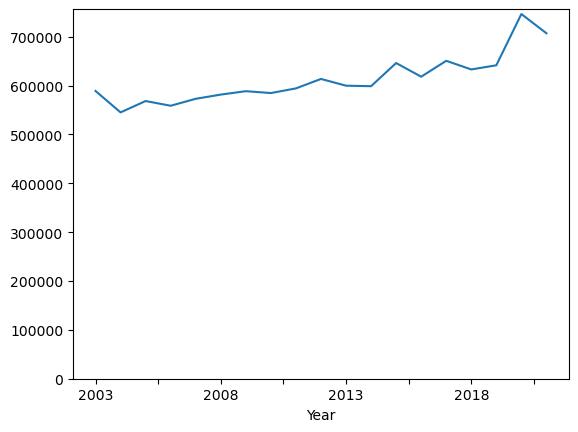

In [16]:
cause_morte_years["Totale"].plot.line()
plt.ylim(0)
#plt.yticks([400000, 500000, 600000, 700000])
plt.show()

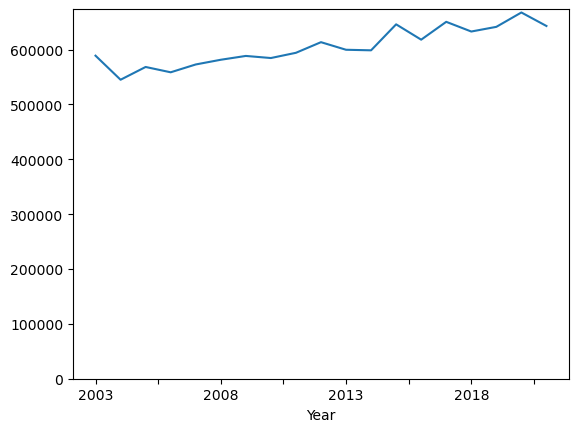

In [17]:
cause_morte_years_no_covid = cause_morte_years["Totale"]-cause_morte_years["Covid-19"]
cause_morte_years_no_covid.plot.line()
plt.ylim(0)
plt.show()

In [18]:
popolazione_year = pd.read_csv("Datasets/popolazione_03_21.csv", sep=";", index_col=0)

morti_per_year = cause_morte_years["Totale"]
morti_per_year_norm = {}
for year in range(2003, 2022):
    morti_per_year_norm[str(year)] = morti_per_year.loc[str(year)]/popolazione_year.loc[year][0]


#morti_per_year_norm = pd.DataFrame.from_dict(morti_per_year_norm, orient='index',columns=['Rapporto morti/popolazione'])
morti_per_year_norm= pd.Series(morti_per_year_norm)
morti_per_year_norm.head()

2003    0.010298
2004    0.009461
2005    0.009791
2006    0.009584
2007    0.009791
dtype: float64

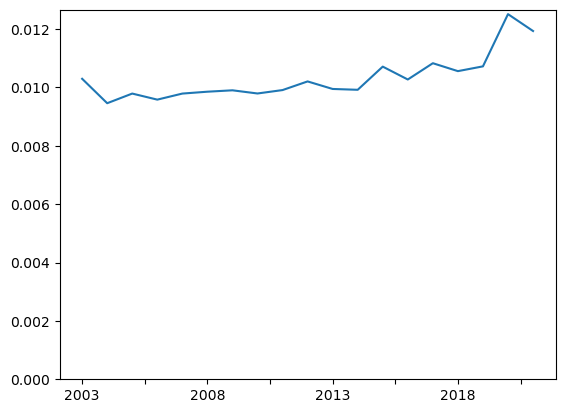

In [19]:
morti_per_year_norm.plot.line(legend=False)
plt.ylim(0)
plt.show()

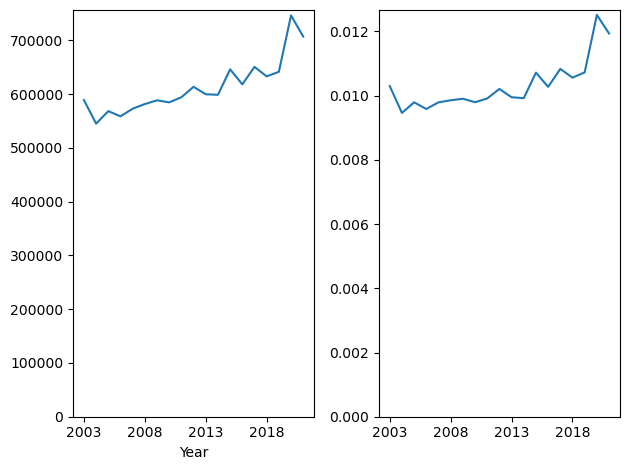

In [20]:
plt.subplot(1, 2, 1)
cause_morte_years["Totale"].plot.line()
plt.ylim(0)
#plt.yticks([400000, 500000, 600000, 700000])

plt.subplot(1, 2, 2)
morti_per_year_norm.plot.line(legend=False)
plt.ylim(0)
plt.tight_layout()

plt.show()

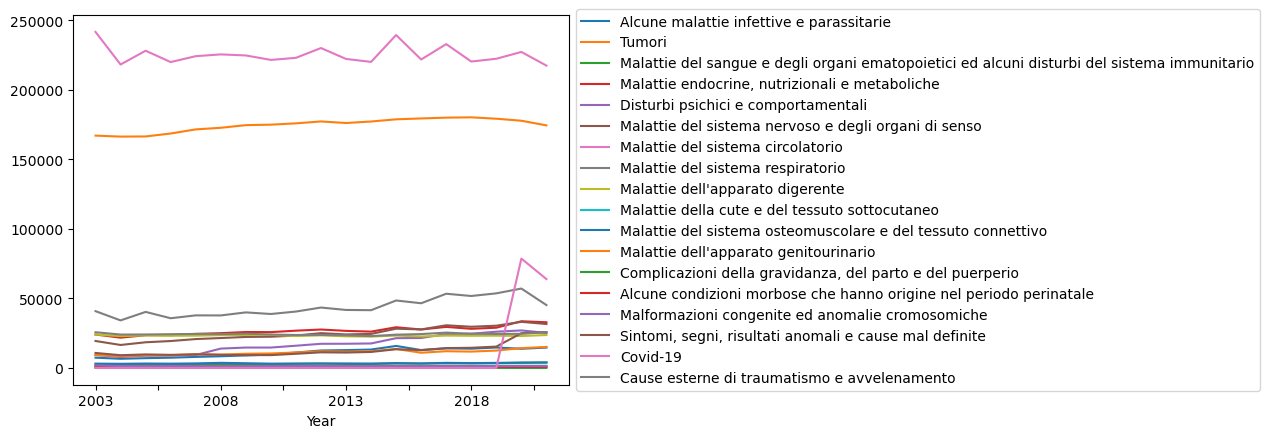

In [21]:
cause_morte = pd.read_csv("./Datasets/cause_morte.csv", sep=";", decimal=".", thousands=',')
cause_morte = cause_morte.set_index("Cause di morte")
cause_morte_years = cause_morte.T
cause_morte_years.index.names = ["Year"]
cause_morte_years_no_totale=cause_morte_years.drop(columns=["Totale"])
cause_morte_years_no_totale.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

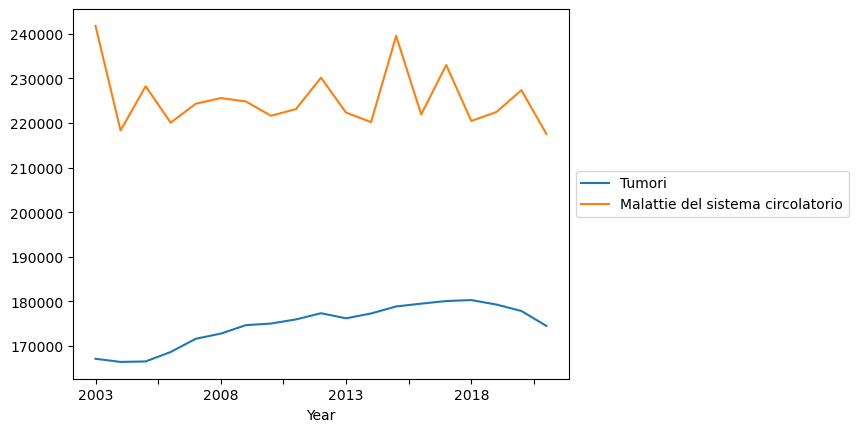

In [39]:
cause_morte_years_più_morti=cause_morte_years[["Tumori","Malattie del sistema circolatorio"]]
cause_morte_years_più_morti.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
#plt.ylim(0)
plt.show()

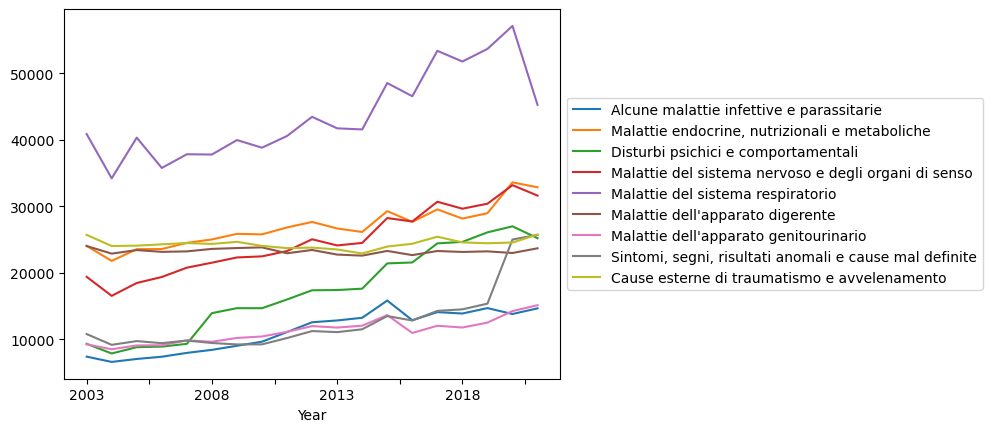

In [23]:
cause_morte_years_medie=cause_morte_years.drop(columns=["Totale","Tumori","Malattie del sistema circolatorio","Covid-19","Complicazioni della gravidanza, del parto e del puerperio","Malformazioni congenite ed anomalie cromosomiche","Alcune condizioni morbose che hanno origine nel periodo perinatale","Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario","Malattie della cute e del tessuto sottocutaneo ","Malattie del sistema osteomuscolare e del tessuto connettivo"])
#cause_morte_years.head()
cause_morte_years_medie.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()


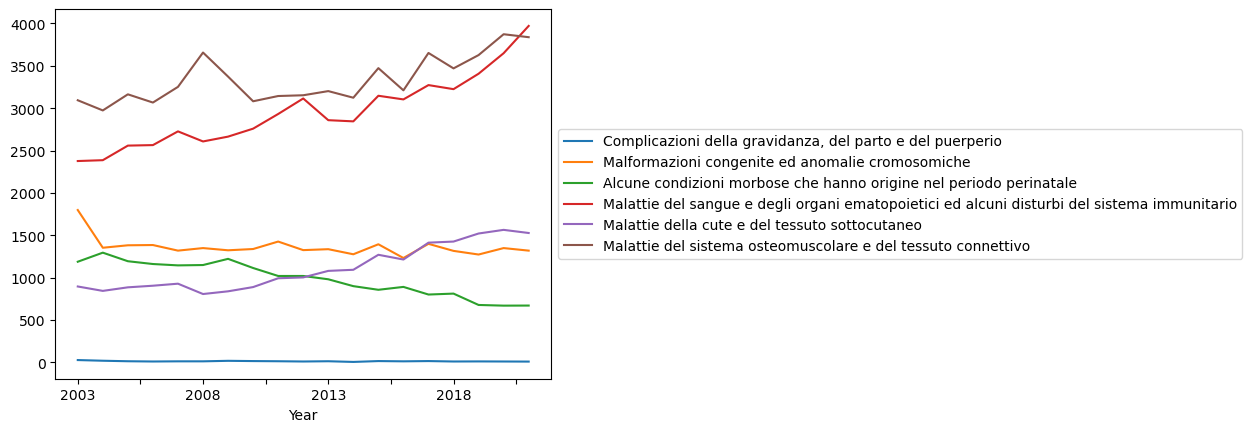

In [24]:
cause_morte_years_meno_morti=cause_morte_years[["Complicazioni della gravidanza, del parto e del puerperio","Malformazioni congenite ed anomalie cromosomiche","Alcune condizioni morbose che hanno origine nel periodo perinatale","Malattie del sangue e degli organi ematopoietici ed alcuni disturbi del sistema immunitario","Malattie della cute e del tessuto sottocutaneo ","Malattie del sistema osteomuscolare e del tessuto connettivo"]]
cause_morte_years_meno_morti.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [25]:
statoSaluteRegioniAllYears=pd.read_csv("Datasets/Stato di salute-regioni.csv", sep=";",decimal=",",thousands=".")
statoSaluteRegioniAllYears.head()

,Tempo,Territorio,buona salute,almeno una malattia cronica,almeno due malattie croniche
0,2009,Piemonte,2996.0,1718.0,875.0
1,2009,Valle d'Aosta,88.0,48.0,22.0
2,2009,Liguria,1088.0,681.0,378.0
3,2009,Lombardia,6748.0,3757.0,1856.0
4,2009,Trentino-Alto Adige,804.0,340.0,142.0


In [26]:
statoSaluteAllYears = statoSaluteRegioniAllYears.drop(columns="Territorio")
statoSaluteAllYears=statoSaluteAllYears.groupby(["Tempo"]).sum()
statoSaluteAllYears.head()

,buona salute,almeno una malattia cronica,almeno due malattie croniche
Tempo,,,
2009,41338.0,23140.0,12125.0
2010,42347.0,23106.0,12053.0
2011,42328.0,22996.0,12008.0
2012,42528.0,23154.0,12299.0
2013,42354.0,22887.0,12074.0


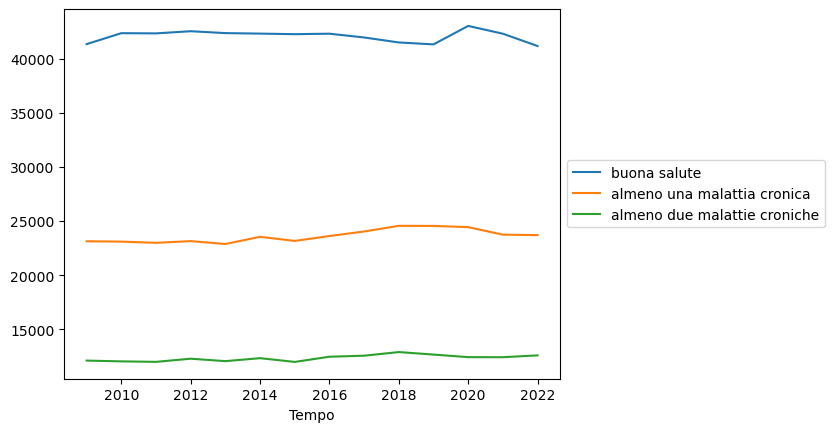

In [27]:
statoSaluteAllYears.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()

In [28]:
personaleMedicoTotaleAllYears=pd.read_csv("Datasets/Personale sanitario totale_2013_2022.csv", sep=";",decimal=",",thousands=".")
personaleMedicoTotaleAllYears=personaleMedicoTotaleAllYears.set_index("Profilo professionale").T
personaleMedicoTotaleAllYears.head()

Profilo professionale,Totale medici (generici e specialisti)
2013,38.95
2014,39.11
2015,38.70
2016,39.86
2017,40.25


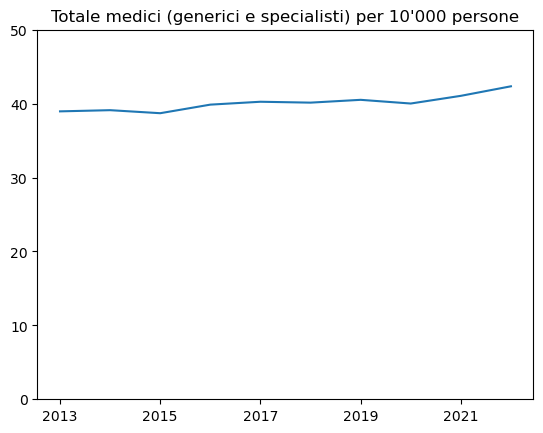

In [40]:
#NON TENGO CONTO DI INFERMIERI, FARMACISTI, ETC. IN QUESTO GRAFICO
personaleMedicoTotaleAllYears.plot.line(legend=False)
plt.title("Totale medici (generici e specialisti) per 10'000 persone")
plt.ylim(0,50)
plt.show()

In [56]:
personaleMedicoAllYears=pd.read_csv("Datasets/Personale sanitario_categorie.csv", sep=";",decimal=",",thousands=".")
personaleMedicoAllYears=personaleMedicoAllYears.set_index("Profilo professionale").T
personaleMedicoAllYears["Totale"]= personaleMedicoAllYears.sum(axis=1)
personaleMedicoAllYears
personaleMedicoAllYears.head()

Profilo professionale,Medici specialisti,Medici generici,Odontoiatri,Ostetriche,Professioni sanitarie infermieristiche,Farmacisti,Totale
2013,29.95,9.00,7.80,2.49,50.74,11.35,111.33
2014,30.24,8.86,7.89,2.59,53.17,11.65,114.40
2015,29.80,8.90,7.90,2.59,54.89,11.61,115.69
2016,30.87,8.99,8.08,2.75,56.14,11.66,118.49
2017,31.18,9.07,8.26,2.78,58.50,11.82,121.61


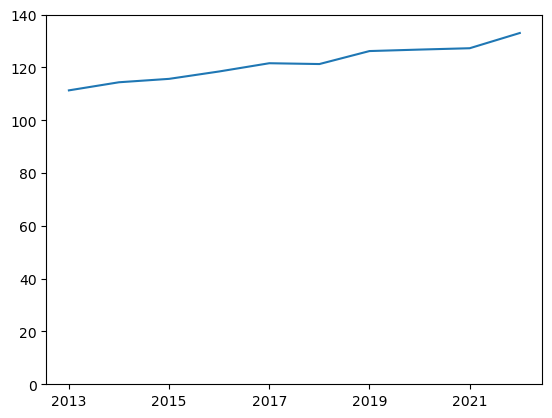

In [60]:
#TENGO CONTO DI INFERMIERI, FARMACISTI, ETC. IN QUESTO GRAFICO
personaleMedicoAllYears.Totale.plot.line()
plt.ylim(0,140)
plt.show()

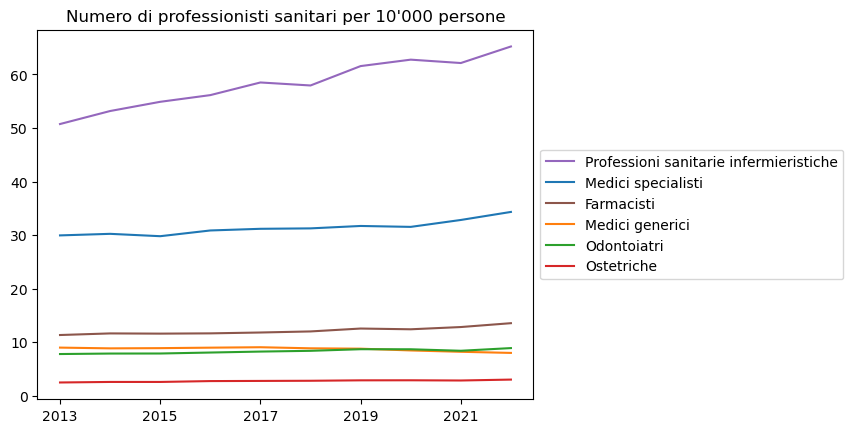

In [45]:
#CONFRONTO TUTTE LE PROFESSIONI SANITARIE
personaleMedicoAllYears.plot.line()
handles, labels = plt.gca().get_legend_handles_labels()
order=[4,0,5,1,2,3]
plt.legend([handles[idx] for idx in order],[labels[idx] for idx in order],loc='center left', bbox_to_anchor=(1, 0.5)) 
plt.title("Numero di professionisti sanitari per 10'000 persone")
plt.show()

In [32]:
mediciSpecialistiAllYears=pd.read_csv("Datasets/Personale sanitario_medici specialisti.csv", sep=";",decimal=",",thousands=".")
mediciSpecialistiAllYears=mediciSpecialistiAllYears.set_index("Profilo professionale").T
mediciSpecialistiAllYears= mediciSpecialistiAllYears.drop(columns=["Altri medici specialisti"])
mediciSpecialistiAllYears.head()

Profilo professionale,Anestesisti,Cardiologi,Chirurghi,Gastroenterologi,Geriatri,Neurologi,Oncologi,Ortopedici,Otorinolaringoiatri,Urologi,Pediatri
2013,2.01,2.14,1.49,0.57,0.71,1.12,0.73,1.53,0.73,0.63,2.90
2014,2.06,2.18,1.40,0.58,0.73,1.10,0.74,1.57,0.74,0.64,2.90
2015,1.96,2.11,1.42,0.55,0.66,1.03,0.72,1.51,0.74,0.64,2.86
2016,2.09,2.18,1.46,0.56,0.69,1.08,0.74,1.56,0.76,0.67,2.94
2017,2.15,2.20,1.49,0.57,0.71,1.10,0.76,1.52,0.77,0.68,2.89


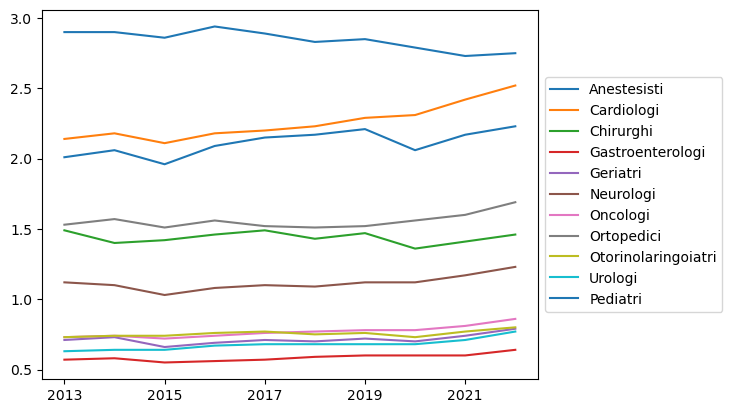

In [33]:
mediciSpecialistiAllYears.plot.line()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.show()